In [1]:
import pandas as pd
import json 

In [2]:
DIR_PATH = "/Users/given/projects/sound-symbolism/results/logit_lens"

WORD_GROUP = "common"

In [3]:
def get_logit_lens(input_type):
    file_path = f"{DIR_PATH}/{input_type}_common.json"
    with open(file_path, 'r') as file:
        logit_lens_results = json.load(file)
    
    return logit_lens_results

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_probs(results, key, input_type, log_scale=False):
    probs, is_correct = results
    lang, word, dim = key.split("_")
    title = f"{word} ({lang})  : {input_type} : {is_correct}"
    data = np.array(probs)
    y1 = data[:, 0]
    y2 = data[:, 1]
    x = np.arange(len(y1))
    
    plt.figure(figsize=(6, 3))
    
    
    max_idx = np.unravel_index(np.argmax(data), data.shape)
    max_x = max_idx[0]
    max_y = data[max_idx]
    
    plt.scatter(max_x, max_y, color='red', s=100, zorder=5)
    plt.text(max_x, max_y, f"{max_y:.3g}", color='red', fontsize=12, ha='left', va='bottom')
    
    
    
    dim1, dim2 = dim.split("-")
    plt.plot(x, y1, label=f'{dim1}', 
             # marker='o'
             )
    plt.plot(x, y2, label=f'{dim2}', 
             # marker='s'
             )
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [5]:
original = get_logit_lens("original")
ipa = get_logit_lens("ipa")
audio = get_logit_lens("audio")
original_and_audio = get_logit_lens("original_and_audio")
ipa_and_audio = get_logit_lens("ipa_and_audio")

In [6]:
# intersection keys for all 
intersection_keys = list(
    set(original.keys()) & set(ipa.keys()) & set(audio.keys()) & set(original_and_audio.keys()) & set(ipa_and_audio.keys())
)

In [7]:
def get_results(logit_lens_results, key):
    probs = []
    is_correct = None
    for layer_id, v in logit_lens_results[key].items():
        if isinstance(v, bool): 
            is_correct = v
        else:
            probs.append(v["choice"]["prob"])
    
    return probs, is_correct 
    

In [8]:
import random 
KEY = random.choice(intersection_keys)

In [9]:
original_results = get_results(original, KEY)
audio_results = get_results(audio, KEY)
original_and_audio_results = get_results(original_and_audio, KEY)
original_and_audio_results = original_and_audio_results[0], not original_and_audio_results[1]  # unpacking the tuple


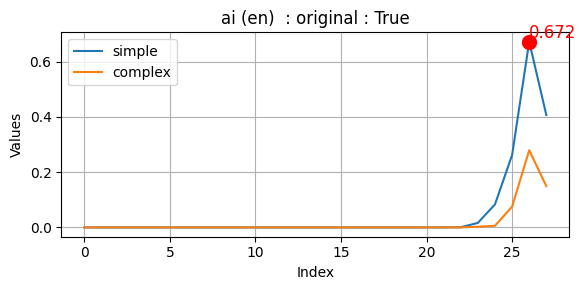

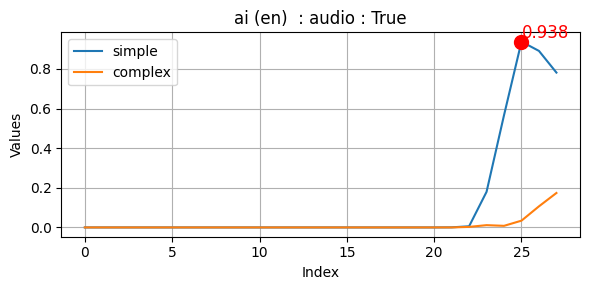

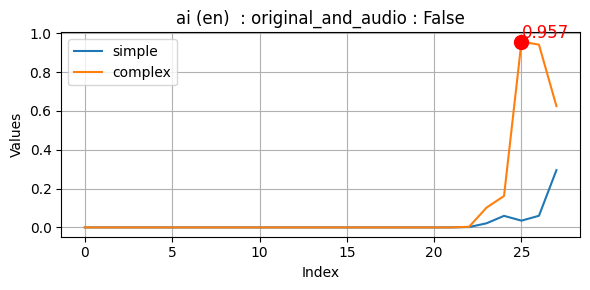

In [10]:
plot_probs(original_results, KEY, "original")
plot_probs(audio_results, KEY, "audio")
plot_probs(original_and_audio_results, KEY, "original_and_audio")
